In [356]:
import pandas as pd
from pandas import ExcelWriter, ExcelFile
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from random import sample
from numpy.random import uniform
from math import isnan

In [357]:
# TODO: sheet_name change
original_df= pd.read_excel('test.xlsx', sheet_name='Taxv3')
original_df

Unnamed: 0             Unnamed: 1       Unnamed: 2          Unnamed: 3  \
0          NaN                    NaN              NaN                 NaN   
1          NaN                    NaN        Community                 NaN   
2          NaN                    NaN       Membership                 NaN   
3          NaN                   DAOs           Access                Type   
4          NaN                Uniswap             Open  Profit from Tokens   
5          NaN               Compound             Open  Profit from Tokens   
6          NaN                   Aave             Open  Profit from Tokens   
7          NaN                 Badger             Open  Profit from Tokens   
8          NaN              SushiChef             Open  Profit from Tokens   
9          NaN                  Dxdao             Open  Profit from Tokens   
10         NaN            Yam Finance             Open           Community   
11         NaN                VitaDAO             Open             Decider   
12         NaN            BanklessDAO  Token Ownership           Community   
13         NaN              Forefront  Token Ownership           Community   
14         NaN  Friends with Benefits  Token Ownership            Communiy   
15         NaN              Seed Club  Token Ownership  Profit from Tokens   
16         NaN                Radicle             Open           Community   
17         NaN                 BitDAO             Open  Profit from Tokens   
18         NaN               Flamingo       Invitation             Decider   
19         NaN     MetaCartel Venures  Token Ownership             Decider   
20         NaN                 TheLAO       Invitation             Decider   
21         NaN                 Aragon             Open  Profit from Tokens   
22         NaN                 Colony             Open  Profit from Tokens   
23         NaN               PrimeDao     Token Staked             Decider   
24         NaN    Jenny Metaverse DAO  Token Ownership           Community   
25         NaN             MeebitsDAO  Token Ownership           Community   
26         NaN            SquiggleDAO  Token Ownership           Community   
27         NaN             OlympusDAO             Open  Profit from Tokens   
28         NaN                   Lido             Open  Profit from Tokens   
29         NaN               MakerDAO             Open           Community   
30         NaN           Fei Protocol             Open  Profit from Tokens   
31         NaN              Mango DAO             Open  Profit from Tokens   
32         NaN              SuperRare             Open  Profit from Tokens   
33         NaN              Synthetix             Open  Profit from Tokens   
34         NaN            UXDProtocol             Open  Profit from Tokens   
35         NaN                ApeCoin             Open           Community   
36         NaN              Curve DAO             Open           Community   
37         NaN                   Dash             Open             Decider   
38         NaN                    NaN              NaN                 NaN   
39         NaN                    NaN              NaN                 NaN   
40         NaN                    NaN              NaN                 NaN   
41         NaN                    NaN              NaN                 NaN   
42         NaN                    NaN              NaN                 NaN   
43         NaN                    NaN              NaN                 NaN   
44         NaN                    NaN              NaN                 NaN   
45         NaN                    NaN              NaN                 NaN   
46         NaN                    NaN              NaN                 NaN   
47         NaN                    NaN              NaN                 NaN   
48         NaN                    NaN              NaN                 NaN   

        Unnamed: 4    Unnamed: 5           Unnamed: 6  \
0              NaN           NaN              

In [358]:
df = original_df.iloc[3:]
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df = df.iloc[:34]
df = df.iloc[:, 2:-8]
df

3            Access                Type Is hierachical     Anonymity  \
4              Open  Profit from Tokens             No     Anonymous   
5              Open  Profit from Tokens             No     Anonymous   
6              Open  Profit from Tokens             No     Anonymous   
7              Open  Profit from Tokens             No     Anonymous   
8              Open  Profit from Tokens             No     Anonymous   
9              Open  Profit from Tokens             No  Pseudonymous   
10             Open           Community             No  Pseudonymous   
11             Open             Decider             No     Anonymous   
12  Token Ownership           Community            Yes  Pseudonymous   
13  Token Ownership           Community             No  Pseudonymous   
14  Token Ownership            Communiy            Yes  Pseudonymous   
15  Token Ownership  Profit from Tokens             No  Pseudonymous   
16             Open           Community             No     Anonymous   
17             Open  Profit from Tokens             No     Anonymous   
18       Invitation             Decider             No         Known   
19  Token Ownership             Decider             No         Known   
20       Invitation             Decider             No         Known   
21             Open  Profit from Tokens             No     Anonymous   
22             Open  Profit from Tokens             No     Anonymous   
23     Token Staked             Decider             No     Anonymous   
24  Token Ownership           Community             No  Pseudonymous   
25  Token Ownership           Community             No  Pseudonymous   
26  Token Ownership           Community            Yes  Pseudonymous   
27             Open  Profit from Tokens             No  Pseudonymous   
28             Open  Profit from Tokens             No  Pseudonymous   
29             Open           Community             No  Pseudonymous   
30             Open  Profit from Tokens             No  Pseudonymous   
31             Open  Profit from Tokens             No  Pseudonymous   
32             Open  Profit from Tokens             No  Pseudonymous   
33             Open  Profit from Tokens             No  Pseudonymous   
34             Open  Profit from Tokens             No  Pseudonymous   
35             Open           Community             No  Pseudonymous   
36             Open           Community            Yes  Pseudonymous   
37             Open             Decider            Yes  Pseudonymous   

3  Contributor Rewards                            Purpose  \
4     Governance Token   Product Building and Management    
5     Governance Token   Product Building and Management    
6     Governance Token   Product Building and Management    
7     Governance Token   Product Building and Management    
8     Governance Token   Product Building and Management    
9            REP Token   Product Building and Management    
10        Other Tokens   Product Building and Management    
11        Other Tokens   Product Building and Management    
12        Other Tokens  Community Building and Engagement   
13        Other Tokens  Community Building and Engagement   
14    Governance Token  Community Building and Engagement   
15        Other Tokens         Investing or Fund Raising    
16        Other Tokens  Community Building and Engagement   
17        Other Tokens         Investing or Fund Raising    
18    Governance Token         Investing or Fund Raising    
19        Other Tokens         Investing or Fund Raising    
20    Governance Token         Investing or Fund Raising    
21        Other Tokens   Product Building and Management    
22    Governance Token   Product Building and Management    
23           REP Token   Product Building and Management    
24    Governance Token  Community Building and Engagement   
25        Other Tokens  Community Building and Engagement   
26        Other Tokens  Community Building and Engagement   
27    Governanc

In [359]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df_drop).toarray())

In [360]:
pca = PCA(n_components=5)
pca.fit(encoder_df)
pca_samples = pca.transform(encoder_df)

In [361]:
ps = pd.DataFrame(pca_samples)

In [362]:
tocluster = pd.DataFrame(ps[[4,0]])

clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_

In [363]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_kmeans = kmeans.fit_predict(ps)
cluster_kmeans

array([0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2], dtype=int32)

In [364]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=1.5,min_samples=3,metric='euclidean')
dbscan=db.fit(ps)
dbscan.labels_

array([-1,  0,  0,  1,  1,  0, -1,  1,  2,  2,  2,  2, -1,  1,  3,  3,  3,
        0,  1,  0,  2,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  4,  4,  4])

In [365]:
clustering = AgglomerativeClustering(n_clusters=4).fit(encoder_df)
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3])

In [377]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm.fit(ps)

# predict the cluster for each data point
cluster_gmm = gmm.predict(ps)
cluster_gmm

array([0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 1, 1, 3, 0, 2, 2, 2, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3])

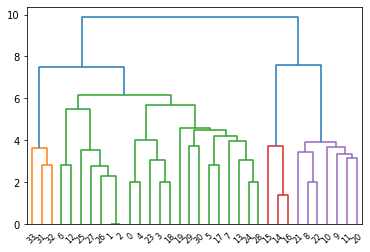

In [378]:
dend = shc.dendrogram(shc.linkage(encoder_df, method='ward'))

In [379]:
zero_df = pd.DataFrame(columns=df.columns)
one_df = pd.DataFrame(columns=df.columns)
two_df = pd.DataFrame(columns=df.columns)
three_df = pd.DataFrame(columns=df.columns)
for id, value in enumerate(clustering.labels_):
    if value == 0:
        zero_df = pd.concat([zero_df, df.iloc[[id]]])
    if value == 1:
        one_df = pd.concat([one_df, df.iloc[[id]]])
    if value == 2:
        two_df = pd.concat([two_df, df.iloc[[id]]])
    if value == 3:
        three_df = pd.concat([three_df, df.iloc[[id]]])
three_df

3  Access       Type Is hierachical     Anonymity Contributor Rewards  \
35   Open  Community             No  Pseudonymous           REP Token   
36   Open  Community            Yes  Pseudonymous           REP Token   
37   Open    Decider            Yes  Pseudonymous    Governance Token   

3                           Purpose              Token Type Primary Type  \
35  Product Building and Management                Singular        ERC20   
36  Product Building and Management  Primary and Reputation        ERC20   
37  Product Building and Management                Singular        ERC20   

3  Supply Cap Entry Barriers  ...  Execution has Proposal Creation Restricted  \
35        Yes      Ownership  ...     Manual                        Allowlist   
36        Yes      Ownership  ...  Automatic                             None   
37        Yes      Ownership  ...     Manual                             None   

3  is fully On-Chain           Power Limits Diversification Stakes Tokens  \
35                No   #Tokens Owned   None            Very           Yes   
36                No   #Tokens Owned   None            Very           Yes   
37               Yes  Per Individual   None            Very           Yes   

3  Capital Gain Initial Airdrop Initial Token Sale  
35     Services             Yes                 No  
36     Services             Yes                 No  
37     Services             Yes                 No  

[3 rows x 21 columns]

In [380]:
per_zero = int(np.floor(len(zero_df)/34*100))
per_one = int(np.floor(len(one_df)/34*100))
per_two = int(np.floor(len(two_df)/34*100))
per_three = int(np.floor(len(three_df)/34*100))

In [381]:
final_df = pd.concat([zero_df.mode(), one_df.mode(), two_df.mode(), three_df.mode()])
final_df = final_df.drop([1])
final_df.index=(f'Cluster1: {per_zero}', f'Cluster2: {per_one}', f'Cluster3: {per_two}', f'Cluster4: {per_three}')
final_df = final_df.transpose()
final_df

Cluster1: 61  \
3                                                                    
Access                                                        Open   
Type                                            Profit from Tokens   
Is hierachical                                                  No   
Anonymity                                                Anonymous   
Contributor Rewards                                   Other Tokens   
Purpose                           Product Building and Management    
Token Type                                                Singular   
Primary Type                                                 ERC20   
Supply Cap                                                     Yes   
Entry Barriers                                           Ownership   
is fully Public                                                Yes   
Execution                                                   Manual   
has Proposal Creation Restricted            Amount of Tokens owned   
is fully On-Chain                                               No   
Power                                                 Tokens Owned   
Limits                                                        None   
Diversification                                               None   
Stakes Tokens                                                   No   
Capital Gain                                              Services   
Initial Airdrop                                                 No   
Initial Token Sale                                             Yes   

                                                       Cluster2: 20  \
3                                                                     
Access                                              Token Ownership   
Type                                                      Community   
Is hierachical                                                   No   
Anonymity                                              Pseudonymous   
Contributor Rewards                                    Other Tokens   
Purpose                           Community Building and Engagement   
Token Type                                                 Singular   
Primary Type                                                  ERC20   
Supply Cap                                                      Yes   
Entry Barriers                                            Ownership   
is fully Public                                                 Yes   
Execution                                                    Manual   
has Proposal Creation Restricted                          Whitelist   
is fully On-Chain                                                No   
Power                                                  Tokens Owned   
Limits                                                         None   
Diversification                                                None   
Stakes Tokens                                                    No   
Capital Gain                                            Token Sales   
Initial Airdrop                                                  No   
Initial Token Sale                                               No   

                                                 Cluster3: 8  \
3                                                              
Access                                            Invitation   
Type                                                 Decider   
Is hierachical                                            No   
Anonymity                                              Known   
Contributor Rewards                         Governance Token   
Purpose                           Investing or Fund Raising    
Token Type                                          Singular   
Primary Type                                           ERC20   
Supply Cap                                               Yes   
Entry Barriers                                    Invitation   
is fully Public                          

In [382]:
zero_df = pd.DataFrame(columns=df.columns)
one_df = pd.DataFrame(columns=df.columns)
two_df = pd.DataFrame(columns=df.columns)
three_df = pd.DataFrame(columns=df.columns)
for id, value in enumerate(cluster_kmeans):
    if value == 0:
        zero_df = pd.concat([zero_df, df.iloc[[id]]])
    if value == 1:
        one_df = pd.concat([one_df, df.iloc[[id]]])
    if value == 2:
        two_df = pd.concat([two_df, df.iloc[[id]]])
    if value == 3:
        three_df = pd.concat([three_df, df.iloc[[id]]])
three_df

3            Access     Type Is hierachical Anonymity Contributor Rewards  \
18       Invitation  Decider             No     Known    Governance Token   
19  Token Ownership  Decider             No     Known        Other Tokens   
20       Invitation  Decider             No     Known    Governance Token   

3                      Purpose Token Type Primary Type Supply Cap  \
18  Investing or Fund Raising    Singular        ERC20        Yes   
19  Investing or Fund Raising    Singular        ERC20        Yes   
20  Investing or Fund Raising    Singular        ERC20        Yes   

3        Entry Barriers  ... Execution has Proposal Creation Restricted  \
18           Invitation  ...    Manual                        Whitelist   
19  Token + Application  ...    Manual                             None   
20           Invitation  ...    Manual                             None   

3  is fully On-Chain         Power Limits Diversification Stakes Tokens  \
18                No  Tokens Owned   None            Very            No   
19                No  Tokens Owned   None            Very            No   
20                No  Tokens Owned   None            Very            No   

3         Capital Gain Initial Airdrop Initial Token Sale  
18  Investment Returns              No                Yes  
19  Investment Returns             NaN                NaN  
20  Investment Returns              No                Yes  

[3 rows x 21 columns]

In [383]:
per_zero = int(np.floor(len(zero_df)/34*100))
per_one = int(np.floor(len(one_df)/34*100))
per_two = int(np.floor(len(two_df)/34*100))
per_three = int(np.floor(len(three_df)/34*100))

In [384]:
final_df = pd.concat([zero_df.mode(), one_df.mode(), two_df.mode(), three_df.mode()])
final_df = final_df.drop([1])
final_df.index=(f'Cluster1: {per_zero}', f'Cluster2: {per_one}', f'Cluster3: {per_two}', f'Cluster4: {per_three}')
final_df = final_df.transpose()
final_df

Cluster1: 50  \
3                                                                    
Access                                                        Open   
Type                                            Profit from Tokens   
Is hierachical                                                  No   
Anonymity                                             Pseudonymous   
Contributor Rewards                               Governance Token   
Purpose                           Product Building and Management    
Token Type                                                Singular   
Primary Type                                                 ERC20   
Supply Cap                                                     Yes   
Entry Barriers                                           Ownership   
is fully Public                                                Yes   
Execution                                                   Manual   
has Proposal Creation Restricted            Amount of Tokens owned   
is fully On-Chain                                               No   
Power                                                 Tokens Owned   
Limits                                                        None   
Diversification                                               None   
Stakes Tokens                                                  Yes   
Capital Gain                                              Services   
Initial Airdrop                                                 No   
Initial Token Sale                                             Yes   

                                                       Cluster2: 26  \
3                                                                     
Access                                              Token Ownership   
Type                                                      Community   
Is hierachical                                                   No   
Anonymity                                              Pseudonymous   
Contributor Rewards                                    Other Tokens   
Purpose                           Community Building and Engagement   
Token Type                                                 Singular   
Primary Type                                                  ERC20   
Supply Cap                                                      Yes   
Entry Barriers                                            Ownership   
is fully Public                                                 Yes   
Execution                                                    Manual   
has Proposal Creation Restricted                          Whitelist   
is fully On-Chain                                                No   
Power                                                  Tokens Owned   
Limits                                                         None   
Diversification                                                None   
Stakes Tokens                                                    No   
Capital Gain                                            Token Sales   
Initial Airdrop                                                  No   
Initial Token Sale                                               No   

                                                     Cluster3: 14  \
3                                                                   
Access                                                       Open   
Type                                                    Community   
Is hierachical                                                 No   
Anonymity                                            Pseudonymous   
Contributor Rewards                              Governance Token   
Purpose                           Product Building and Management   
Token Type                                               Singular   
Primary Type                                                ERC20   
Supply Cap                                                    Yes   
Entry Barriers                                    

In [388]:
zero_df = pd.DataFrame(columns=df.columns)
one_df = pd.DataFrame(columns=df.columns)
two_df = pd.DataFrame(columns=df.columns)
three_df = pd.DataFrame(columns=df.columns)
four_df = pd.DataFrame(columns=df.columns)
for id, value in enumerate(dbscan.labels_):
    if value == 0:
        zero_df = pd.concat([zero_df, df.iloc[[id]]])
    if value == 1:
        one_df = pd.concat([one_df, df.iloc[[id]]])
    if value == 2:
        two_df = pd.concat([two_df, df.iloc[[id]]])
    if value == 3:
        three_df = pd.concat([three_df, df.iloc[[id]]])
three_df

3            Access     Type Is hierachical Anonymity Contributor Rewards  \
18       Invitation  Decider             No     Known    Governance Token   
19  Token Ownership  Decider             No     Known        Other Tokens   
20       Invitation  Decider             No     Known    Governance Token   

3                      Purpose Token Type Primary Type Supply Cap  \
18  Investing or Fund Raising    Singular        ERC20        Yes   
19  Investing or Fund Raising    Singular        ERC20        Yes   
20  Investing or Fund Raising    Singular        ERC20        Yes   

3        Entry Barriers  ... Execution has Proposal Creation Restricted  \
18           Invitation  ...    Manual                        Whitelist   
19  Token + Application  ...    Manual                             None   
20           Invitation  ...    Manual                             None   

3  is fully On-Chain         Power Limits Diversification Stakes Tokens  \
18                No  Tokens Owned   None            Very            No   
19                No  Tokens Owned   None            Very            No   
20                No  Tokens Owned   None            Very            No   

3         Capital Gain Initial Airdrop Initial Token Sale  
18  Investment Returns              No                Yes  
19  Investment Returns             NaN                NaN  
20  Investment Returns              No                Yes  

[3 rows x 21 columns]

In [389]:
per_one = int(np.floor(len(one_df)/34*100))
per_two = int(np.floor(len(two_df)/34*100))
per_three = int(np.floor(len(three_df)/34*100))

In [390]:
final_df = pd.concat([minus_df.mode(), zero_df.mode(), one_df.mode(), two_df.mode(), three_df.mode(), four_df.mode()])
final_df = final_df.drop([1])
final_df.index=(f'Cluster1: {per_zero}', f'Cluster2: {per_one}', f'Cluster3: {per_two}', f'Cluster4: {per_three}')
final_df = final_df.transpose()
final_df

Cluster1: 50  \
3                                                                    
Access                                                        Open   
Type                                            Profit from Tokens   
Is hierachical                                                  No   
Anonymity                                             Pseudonymous   
Contributor Rewards                                   Other Tokens   
Purpose                           Product Building and Management    
Token Type                                                Singular   
Primary Type                                                 ERC20   
Supply Cap                                                     Yes   
Entry Barriers                                           Ownership   
is fully Public                                                Yes   
Execution                                                   Manual   
has Proposal Creation Restricted            Amount of Tokens owned   
is fully On-Chain                                              Yes   
Power                                                 Tokens Owned   
Limits                                                        None   
Diversification                                               None   
Stakes Tokens                                                  Yes   
Capital Gain                                              Services   
Initial Airdrop                                                 No   
Initial Token Sale                                             Yes   

                                                      Cluster2: 14  \
3                                                                    
Access                                                        Open   
Type                                            Profit from Tokens   
Is hierachical                                                  No   
Anonymity                                                Anonymous   
Contributor Rewards                               Governance Token   
Purpose                           Product Building and Management    
Token Type                                                Singular   
Primary Type                                                 ERC20   
Supply Cap                                                     Yes   
Entry Barriers                                           Ownership   
is fully Public                                                Yes   
Execution                                                   Manual   
has Proposal Creation Restricted                         Whitelist   
is fully On-Chain                                               No   
Power                                                 Tokens Owned   
Limits                                                        None   
Diversification                                               None   
Stakes Tokens                                                   No   
Capital Gain                                              Services   
Initial Airdrop                                                Yes   
Initial Token Sale                                              No   

                                                       Cluster3: 20  \
3                                                                     
Access                                              Token Ownership   
Type                                                      Community   
Is hierachical                                                   No   
Anonymity                                              Pseudonymous   
Contributor Rewards                                    Other Tokens   
Purpose                           Community Building and Engagement   
Token Type                                                 Singular   
Primary Type                                                  ERC20   
Supply Cap                                                      Yes   
Entry Barriers                                     

In [337]:
zero_df = pd.DataFrame(columns=df.columns)
one_df = pd.DataFrame(columns=df.columns)
two_df = pd.DataFrame(columns=df.columns)
three_df = pd.DataFrame(columns=df.columns)
for id, value in enumerate(cluster_gmm):
    if value == 0:
        zero_df = pd.concat([zero_df, df.iloc[[id]]])
    if value == 1:
        one_df = pd.concat([one_df, df.iloc[[id]]])
    if value == 2:
        two_df = pd.concat([two_df, df.iloc[[id]]])
    if value == 3:
        three_df = pd.concat([three_df, df.iloc[[id]]])
three_df

3  Access       Type Is hierachical     Anonymity Contributor Rewards  \
35   Open  Community             No  Pseudonymous           REP Token   
36   Open  Community            Yes  Pseudonymous           REP Token   
37   Open    Decider            Yes  Pseudonymous    Governance Token   

3                           Purpose              Token Type Primary Type  \
35  Product Building and Management                Singular        ERC20   
36  Product Building and Management  Primary and Reputation        ERC20   
37  Product Building and Management                Singular        ERC20   

3  Supply Cap Entry Barriers  ... Limits Diversification Stakes Tokens  \
35        Yes      Ownership  ...   None            Very           Yes   
36        Yes      Ownership  ...   None            Very           Yes   
37        Yes      Ownership  ...   None            Very           Yes   

3  Capital Gain Initial Airdrop Initial Token Sale PCA Agglomerative DBSCAN  \
35     Services             Yes                 No   2             3      4   
36     Services             Yes                 No   2             3      4   
37     Services             Yes                 No   2             3      4   

3  GMM  
35   3  
36   3  
37   3  

[3 rows x 25 columns]

In [313]:
per_zero = int(np.floor(len(zero_df)/34*100))
per_one = int(np.floor(len(one_df)/34*100))
per_two = int(np.floor(len(two_df)/34*100))
per_three = int(np.floor(len(three_df)/34*100))

In [314]:
final_df = pd.concat([zero_df.mode(), one_df.mode(), two_df.mode(), three_df.mode()])
final_df.index=(f'Cluster1: {per_zero}', f'Cluster2: {per_one}', f'Cluster3: {per_two}', f'Cluster4: {per_three}')
final_df = final_df.transpose()
final_df

Cluster1: 55  \
3                                                                    
Access                                                        Open   
Type                                            Profit from Tokens   
Is hierachical                                                  No   
Anonymity                                                Anonymous   
Contributor Rewards                               Governance Token   
Purpose                           Product Building and Management    
Token Type                                                Singular   
Primary Type                                                 ERC20   
Supply Cap                                                     Yes   
Entry Barriers                                           Ownership   
is fully Public                                                Yes   
Execution                                                   Manual   
has Proposal Creation Restricted            Amount of Tokens owned   
is fully On-Chain                                               No   
Power                                                 Tokens Owned   
Limits                                                        None   
Diversification                                               None   
Stakes Tokens                                                  Yes   
Capital Gain                                              Services   
Initial Airdrop                                                 No   
Initial Token Sale                                             Yes   

                                                       Cluster2: 26  \
3                                                                     
Access                                              Token Ownership   
Type                                                      Community   
Is hierachical                                                   No   
Anonymity                                              Pseudonymous   
Contributor Rewards                                    Other Tokens   
Purpose                           Community Building and Engagement   
Token Type                                                 Singular   
Primary Type                                                  ERC20   
Supply Cap                                                      Yes   
Entry Barriers                                            Ownership   
is fully Public                                                 Yes   
Execution                                                    Manual   
has Proposal Creation Restricted                          Whitelist   
is fully On-Chain                                                No   
Power                                                  Tokens Owned   
Limits                                                         None   
Diversification                                                None   
Stakes Tokens                                                    No   
Capital Gain                                            Token Sales   
Initial Airdrop                                                 Yes   
Initial Token Sale                                               No   

                                                 Cluster3: 8  \
3                                                              
Access                                            Invitation   
Type                                                 Decider   
Is hierachical                                            No   
Anonymity                                              Known   
Contributor Rewards                         Governance Token   
Purpose                           Investing or Fund Raising    
Token Type                                          Singular   
Primary Type                                           ERC20   
Supply Cap                                               Yes   
Entry Barriers                                    Invitation   
is fully Public                          

In [316]:
df['PCA'] = cluster_kmeans
df['Agglomerative'] = clustering.labels_
df['DBSCAN'] = dbscan.labels_
df['GMM'] = cluster_gmm
df

3            Access                Type Is hierachical     Anonymity  \
4              Open  Profit from Tokens             No     Anonymous   
5              Open  Profit from Tokens             No     Anonymous   
6              Open  Profit from Tokens             No     Anonymous   
7              Open  Profit from Tokens             No     Anonymous   
8              Open  Profit from Tokens             No     Anonymous   
9              Open  Profit from Tokens             No  Pseudonymous   
10             Open           Community             No  Pseudonymous   
11             Open             Decider             No     Anonymous   
12  Token Ownership           Community            Yes  Pseudonymous   
13  Token Ownership           Community             No  Pseudonymous   
14  Token Ownership            Communiy            Yes  Pseudonymous   
15  Token Ownership  Profit from Tokens             No  Pseudonymous   
16             Open           Community             No     Anonymous   
17             Open  Profit from Tokens             No     Anonymous   
18       Invitation             Decider             No         Known   
19  Token Ownership             Decider             No         Known   
20       Invitation             Decider             No         Known   
21             Open  Profit from Tokens             No     Anonymous   
22             Open  Profit from Tokens             No     Anonymous   
23     Token Staked             Decider             No     Anonymous   
24  Token Ownership           Community             No  Pseudonymous   
25  Token Ownership           Community             No  Pseudonymous   
26  Token Ownership           Community            Yes  Pseudonymous   
27             Open  Profit from Tokens             No  Pseudonymous   
28             Open  Profit from Tokens             No  Pseudonymous   
29             Open           Community             No  Pseudonymous   
30             Open  Profit from Tokens             No  Pseudonymous   
31             Open  Profit from Tokens             No  Pseudonymous   
32             Open  Profit from Tokens             No  Pseudonymous   
33             Open  Profit from Tokens             No  Pseudonymous   
34             Open  Profit from Tokens             No  Pseudonymous   
35             Open           Community             No  Pseudonymous   
36             Open           Community            Yes  Pseudonymous   
37             Open             Decider            Yes  Pseudonymous   

3  Contributor Rewards                            Purpose  \
4     Governance Token   Product Building and Management    
5     Governance Token   Product Building and Management    
6     Governance Token   Product Building and Management    
7     Governance Token   Product Building and Management    
8     Governance Token   Product Building and Management    
9            REP Token   Product Building and Management    
10        Other Tokens   Product Building and Management    
11        Other Tokens   Product Building and Management    
12        Other Tokens  Community Building and Engagement   
13        Other Tokens  Community Building and Engagement   
14    Governance Token  Community Building and Engagement   
15        Other Tokens         Investing or Fund Raising    
16        Other Tokens  Community Building and Engagement   
17        Other Tokens         Investing or Fund Raising    
18    Governance Token         Investing or Fund Raising    
19        Other Tokens         Investing or Fund Raising    
20    Governance Token         Investing or Fund Raising    
21        Other Tokens   Product Building and Management    
22    Governance Token   Product Building and Management    
23           REP Token   Product Building and Management    
24    Governance Token  Community Building and Engagement   
25        Other Tokens  Community Building and Engagement   
26        Other Tokens  Community Building and Engagement   
27    Governanc

In [317]:
df.to_excel('output_Migo.xlsx', sheet_name='Clusters')